#GFF plotter

##Helping hands

http://nbviewer.ipython.org/github/herrfz/dataanalysis/blob/master/week2/getting_data.ipynb

http://nbviewer.ipython.org/github/jvns/pandas-cookbook/blob/master/cookbook/Chapter%201%20-%20Reading%20from%20a%20CSV.ipynb


##Imports

In [92]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
#import matplotlib as plt
#plt.use('TkAgg') 

import operator

import pylab
pylab.show()

%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


##Definitions

In [93]:
fileUrl = "probes/extraGff/ITAG2.3_repeats.gff3"
#fileUrl = "probes/extraGff/ITAG2.3_repeats.gff3.Copia.agp"
#fileUrl = "probes/extraGff/ITAG2.3_repeats.gff3.Gypsy.agp"
#fileUrl = "probes/extraGff/ITAG2.3_repeats.gff3.Low_complexity.agp"
#fileUrl = "probes/extraGff/ITAG2.3_repeats.gff3.LTR.agp"
#fileUrl = "probes/extraGff/ITAG2.3_repeats.gff3.Simple_repeat.agp"
#fileUrl = "probes/extraGff/ITAG2.3_repeats.gff3.SINE.agp"



FULL_FIG_W , FULL_FIG_H  = 16, 8
CHROM_FIG_W, CHROM_FIG_H = FULL_FIG_W, 20

##Setup

###Figure sizes controller

In [94]:
class size_controller(object):
    def __init__(self, w, h):
        self.w = w
        self.h = h
        
    def __enter__(self):
        self.o = rcParams['figure.figsize']
        rcParams['figure.figsize'] = self.w, self.h
        return None
    
    def __exit__(self, type, value, traceback):
        rcParams['figure.figsize'] = self.o

###Column type definition

In [95]:
col_type_int  = np.int64
col_type_flo  = np.float64
col_type_str  = np.str_ #np.object
col_type_char = np.character
col_info =[
    [ "chromosome", col_type_str  ], 
    [ "source"    , col_type_str  ],
    [ "type"      , col_type_str  ],
    [ "start"     , col_type_int  ],
    [ "end"       , col_type_int  ],
    [ "qual"      , col_type_int  ],
    [ "strand"    , col_type_char ],
    [ "frame"     , col_type_char ],
    [ "info"      , col_type_str  ],
]

col_names=[cf[0] for cf in col_info]
col_types=dict(zip([c[0] for c in col_info], [c[1] for c in col_info]))
col_types


{'chromosome': numpy.string_,
 'end': numpy.int64,
 'frame': numpy.character,
 'info': numpy.string_,
 'qual': numpy.int64,
 'source': numpy.string_,
 'start': numpy.int64,
 'strand': numpy.character,
 'type': numpy.string_}

##Read GFF

###Parse INFO column

In [96]:
info_keys = set()

def filter_conv(fi):
    global info_keys
    vs = []
    for pair in fi.split(";"):
        kv = pair.split("=")
        info_keys.add(kv[0])
        
        if len(kv) == 2:
            #in case of key/value pairs
            vs.append(kv)
        else:
            #in case of flags such as INDEL
            vs.append([kv[0], True])
         
    x = dict(zip([x[0] for x in vs], [x[1] for x in vs]))
    #z = pd.Series(x)
    #print z
    return x

###Read GFF
http://nbviewer.ipython.org/github/herrfz/dataanalysis/blob/master/week2/getting_data.ipynb

In [97]:
CONVERTERS = {
    'info': filter_conv
}
SKIP_ROWS = 3
NROWS     = None
#index_col=['chromosome', 'start'], usecols=col_names, 
gffData = pd.read_csv(fileUrl, header=None, names=col_names, dtype=col_types, nrows=NROWS, skiprows=SKIP_ROWS, converters=CONVERTERS, verbose=True, delimiter="\t", comment="#")
print gffData.shape
gffData.head()

Tokenization took: 524.97 ms
Type conversion took: 770.81 ms
Parser memory cleanup took: 0.15 ms
Tokenization took: 145.50 ms
Type conversion took: 894.04 ms
Parser memory cleanup took: 0.23 ms
Tokenization took: 62.65 ms
Type conversion took: 592.98 ms
Parser memory cleanup took: 0.09 ms
Tokenization took: 71.85 ms
Type conversion took: 638.06 ms
Parser memory cleanup took: 0.23 ms
Tokenization took: 63.55 ms
Type conversion took: 599.54 ms
Parser memory cleanup took: 0.07 ms
Tokenization took: 80.75 ms
Type conversion took: 653.90 ms
Parser memory cleanup took: 0.20 ms
Tokenization took: 80.61 ms
Type conversion took: 666.66 ms
Parser memory cleanup took: 0.07 ms
Tokenization took: 70.42 ms
Type conversion took: 601.79 ms
Parser memory cleanup took: 0.15 ms
Tokenization took: 73.25 ms
Type conversion took: 605.87 ms
Parser memory cleanup took: 0.24 ms
Tokenization took: 65.60 ms
Type conversion took: 615.90 ms
Parser memory cleanup took: 0.17 ms
Tokenization took: 64.11 ms
Type conve

,chromosome,source,type,start,end,qual,strand,frame,info
0,SL2.40ch00,ITAG_repeats,repeat_region,324,1194,4844,+,.,"{u'score': u'4844', u'repeat_class': u'LTR', u..."
1,SL2.40ch00,ITAG_repeats,repeat_region,1194,3908,7021,-,.,"{u'score': u'7021', u'repeat_class': u'LTR', u..."
2,SL2.40ch00,ITAG_repeats,repeat_region,3532,5893,4848,-,.,"{u'score': u'4848', u'repeat_class': u'LTR/Gyp..."
3,SL2.40ch00,ITAG_repeats,repeat_region,5905,6117,711,-,.,"{u'score': u'711', u'repeat_class': u'LTR', u'..."
4,SL2.40ch00,ITAG_repeats,repeat_region,6112,6888,2527,+,.,"{u'score': u'2527', u'repeat_class': u'LTR/Gyp..."


###Add length column

In [98]:
gffData['length'] = gffData['end'] - gffData['start']
gffData.head()

,chromosome,source,type,start,end,qual,strand,frame,info,length
0,SL2.40ch00,ITAG_repeats,repeat_region,324,1194,4844,+,.,"{u'score': u'4844', u'repeat_class': u'LTR', u...",870
1,SL2.40ch00,ITAG_repeats,repeat_region,1194,3908,7021,-,.,"{u'score': u'7021', u'repeat_class': u'LTR', u...",2714
2,SL2.40ch00,ITAG_repeats,repeat_region,3532,5893,4848,-,.,"{u'score': u'4848', u'repeat_class': u'LTR/Gyp...",2361
3,SL2.40ch00,ITAG_repeats,repeat_region,5905,6117,711,-,.,"{u'score': u'711', u'repeat_class': u'LTR', u'...",212
4,SL2.40ch00,ITAG_repeats,repeat_region,6112,6888,2527,+,.,"{u'score': u'2527', u'repeat_class': u'LTR/Gyp...",776


###Split INFO column

In [99]:
info_keys = list(info_keys)
info_keys.sort()
info_keys


['Target', 'repeat_class', 'score']

In [100]:
info_keys_types = {
        'score': col_type_int
    }

In [101]:
def gen_val_extracter(info_keys_g):

    def val_extracter_l(info_row, **kwargs):
        vals       = [None] * len(info_keys_g)

        for k,v in info_row.items():
            if k in info_keys_g:
                vals[info_keys_g.index(k)] = v
            else:
                pass

        return vals

    return val_extracter_l

#gffData[info_keys] = gffData['info'].apply(gen_val_extracter(info_keys), axis=1).apply(pd.Series, 1)
gffData.head()

,chromosome,source,type,start,end,qual,strand,frame,info,length
0,SL2.40ch00,ITAG_repeats,repeat_region,324,1194,4844,+,.,"{u'score': u'4844', u'repeat_class': u'LTR', u...",870
1,SL2.40ch00,ITAG_repeats,repeat_region,1194,3908,7021,-,.,"{u'score': u'7021', u'repeat_class': u'LTR', u...",2714
2,SL2.40ch00,ITAG_repeats,repeat_region,3532,5893,4848,-,.,"{u'score': u'4848', u'repeat_class': u'LTR/Gyp...",2361
3,SL2.40ch00,ITAG_repeats,repeat_region,5905,6117,711,-,.,"{u'score': u'711', u'repeat_class': u'LTR', u'...",212
4,SL2.40ch00,ITAG_repeats,repeat_region,6112,6888,2527,+,.,"{u'score': u'2527', u'repeat_class': u'LTR/Gyp...",776


##Good part

http://nbviewer.ipython.org/github/jvns/pandas-cookbook/blob/master/cookbook/Chapter%201%20-%20Reading%20from%20a%20CSV.ipynb

http://pandas.pydata.org/pandas-docs/dev/visualization.html

https://bespokeblog.wordpress.com/2011/07/11/basic-data-plotting-with-matplotlib-part-3-histograms/

http://nbviewer.ipython.org/github/mwaskom/seaborn/blob/master/examples/plotting_distributions.ipynb

http://nbviewer.ipython.org/github/herrfz/dataanalysis/blob/master/week3/exploratory_graphs.ipynb

http://pandas.pydata.org/pandas-docs/version/0.15.0/visualization.html

http://www.gregreda.com/2013/10/26/working-with-pandas-dataframes/

###Column types

In [102]:
gffData.dtypes

chromosome    object
source        object
type          object
start          int64
end            int64
qual           int64
strand        object
frame         object
info          object
length         int64
dtype: object

###Global statistics

In [103]:
gffData.describe()

,start,end,qual,length
count,719452.000000,719452.000000,719452.000000,719452.000000
mean,31031106.018389,31031828.507204,3049.023316,722.488815
std,19276516.942177,19276465.288640,6146.785191,1134.258586
min,1.000000,101.000000,225.000000,10.000000
25%,14633272.000000,14633769.750000,414.000000,134.000000
50%,29800838.000000,29801693.000000,938.000000,286.000000
75%,45993830.000000,45994355.250000,2882.000000,814.000000
max,90303999.000000,90304163.000000,223348.000000,24950.000000


In [104]:
maxPos = gffData['end'   ].max()
print "sum   ", gffData['length'].sum()
print "avg   ", gffData['length'].sum() * 1.0 / 950000000

sum    519796023
avg    0.547153708421


In [105]:
chromosomes = np.unique(gffData['chromosome'].values)
chromstats   = {}
for chrom in chromosomes:
    chromdata     = gffData['length'][gffData['chromosome'] == chrom]
    chromdatasize = gffData['end'   ][gffData['chromosome'] == chrom].max() - gffData['start'   ][gffData['chromosome'] == chrom].min()
    chromdatasum  = chromdata.sum()
    #print "chrom", chrom
    #print " size ", chromdatasize
    #print " count", chromdata.count()
    #print " sum  ", chromdatasum
    #print " avg  ", chromdatasum * 1.0 / chromdatasize
    chromstats[ chrom ] = { 'size': chromdatasize, 'count': chromdata.count(), 'sum': chromdatasum, 'avg': chromdatasum * 1.0 / chromdatasize }

chromstats = pd.DataFrame.from_dict(chromstats, orient='index')
#print "col types  ", chromstats.dtypes
#print "col names  ", chromstats.columns
#print "col indexes", chromstats.index
print "median.avg ", chromstats['avg'].median()
print "MAD.avg    ", chromstats['avg'].mad()
print chromstats


median.avg  0.692898630102
MAD.avg     0.047368306838
            count       sum       avg      size
SL2.40ch00  18259  15108999  0.692899  21805497
SL2.40ch01  82700  57588340  0.637715  90304154
SL2.40ch02  42672  26272013  0.526331  49915368
SL2.40ch03  57308  40262223  0.620941  64840680
SL2.40ch04  59205  41640662  0.649983  64064252
SL2.40ch05  61750  45801870  0.704412  65021399
SL2.40ch06  41330  26515047  0.575899  46041151
SL2.40ch07  60262  46105784  0.706422  65266613
SL2.40ch08  59212  44457653  0.705313  63032515
SL2.40ch09  63695  48443622  0.715965  67662037
SL2.40ch10  61399  45208559  0.697294  64834303
SL2.40ch11  49297  35035883  0.656277  53385831
SL2.40ch12  62363  47355368  0.723136  65486131


## Median

In [106]:
gffData.median()

start     29800838
end       29801693
qual           938
length         286
dtype: float64

## MAD

In [107]:
gffData.mad()

start     16316913.910777
end       16316867.722709
qual          3272.999862
length         697.385150
dtype: float64

###List of chromosomes

In [108]:
chromosomes = np.unique(gffData['chromosome'].values)
chromosomes

array(['SL2.40ch00', 'SL2.40ch01', 'SL2.40ch02', 'SL2.40ch03',
       'SL2.40ch04', 'SL2.40ch05', 'SL2.40ch06', 'SL2.40ch07',
       'SL2.40ch08', 'SL2.40ch09', 'SL2.40ch10', 'SL2.40ch11', 'SL2.40ch12'], dtype=object)

###Quality distribution

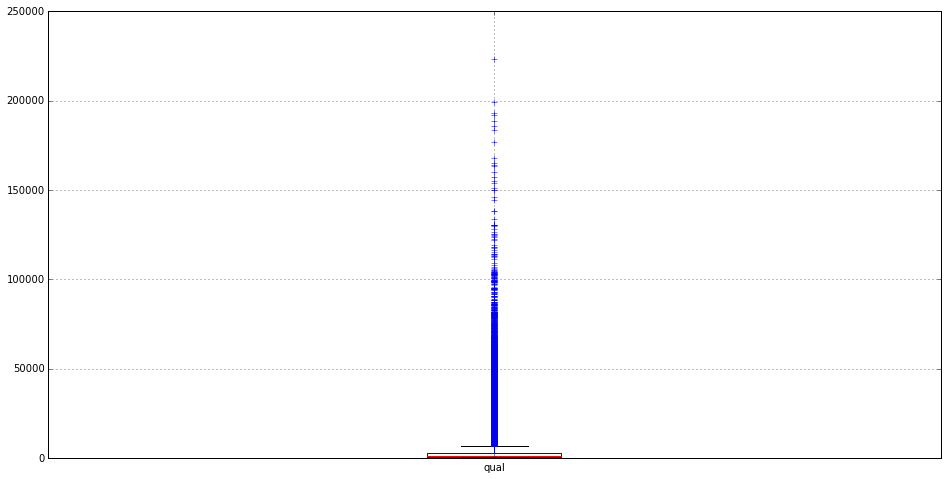

In [109]:
with size_controller(FULL_FIG_W, FULL_FIG_H):
    bq = gffData.boxplot(column='qual', return_type='dict')

###Quality distribution per chromosome

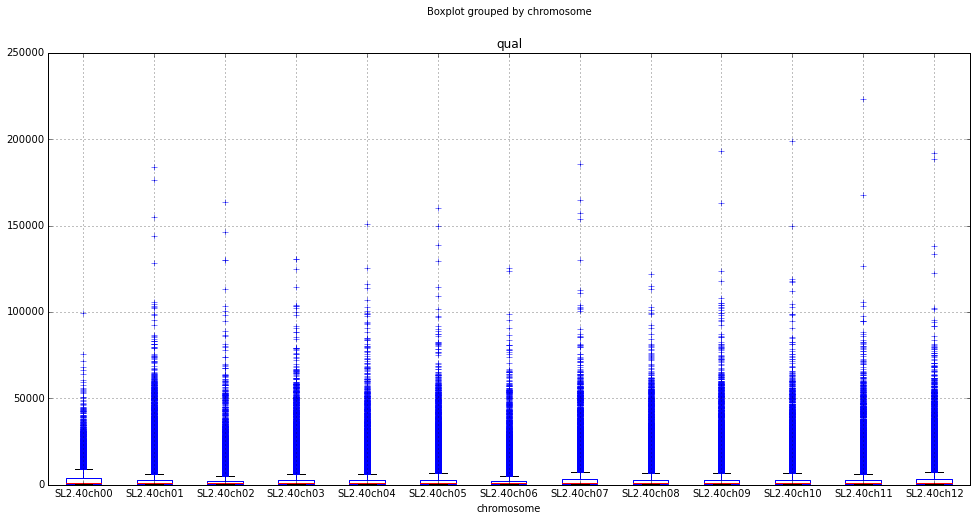

In [110]:
with size_controller(FULL_FIG_W, FULL_FIG_H):
    bqc = gffData.boxplot(column='qual', by='chromosome', return_type='dict')

###Start position distribution per chromosome

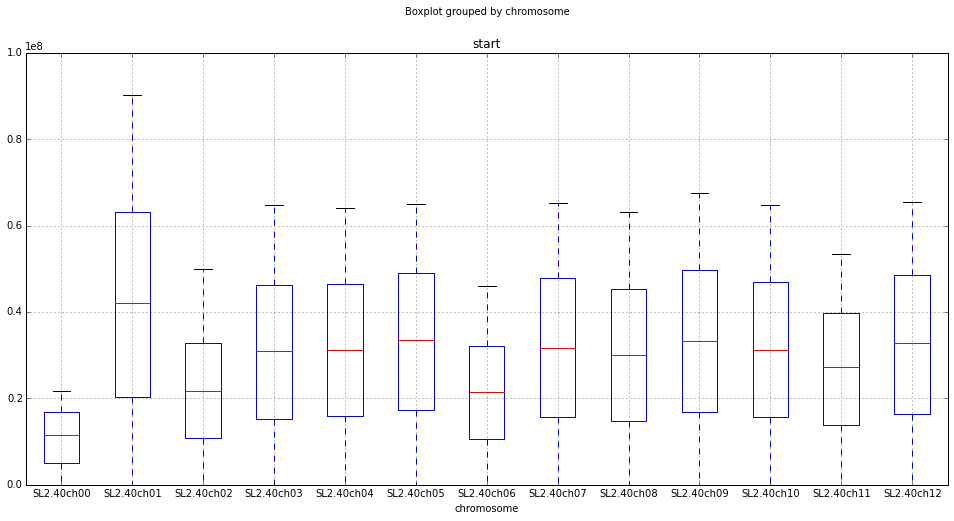

In [111]:
with size_controller(FULL_FIG_W, FULL_FIG_H):
    bqc = gffData.boxplot(column='start', by='chromosome', return_type='dict')

###Position distribution

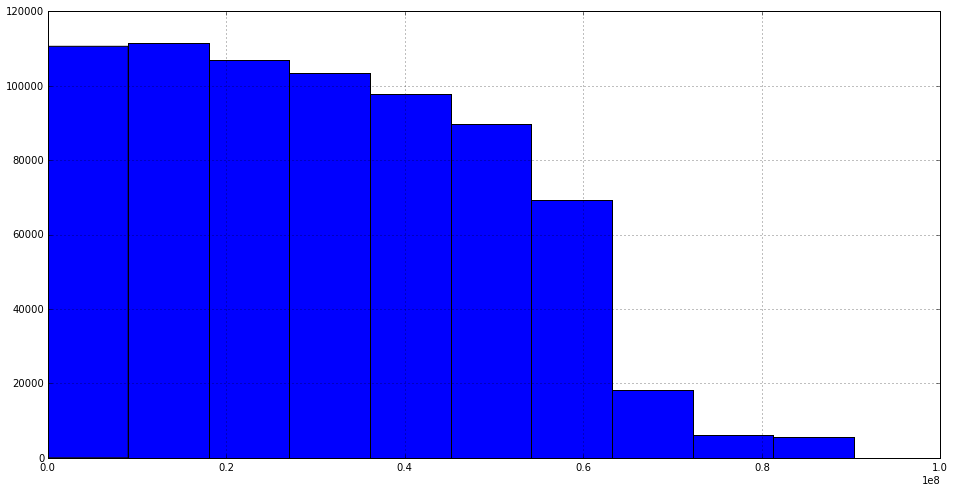

In [112]:
with size_controller(FULL_FIG_W, FULL_FIG_H):
    hs = gffData['start'].hist()

###Position distribution per chromosome

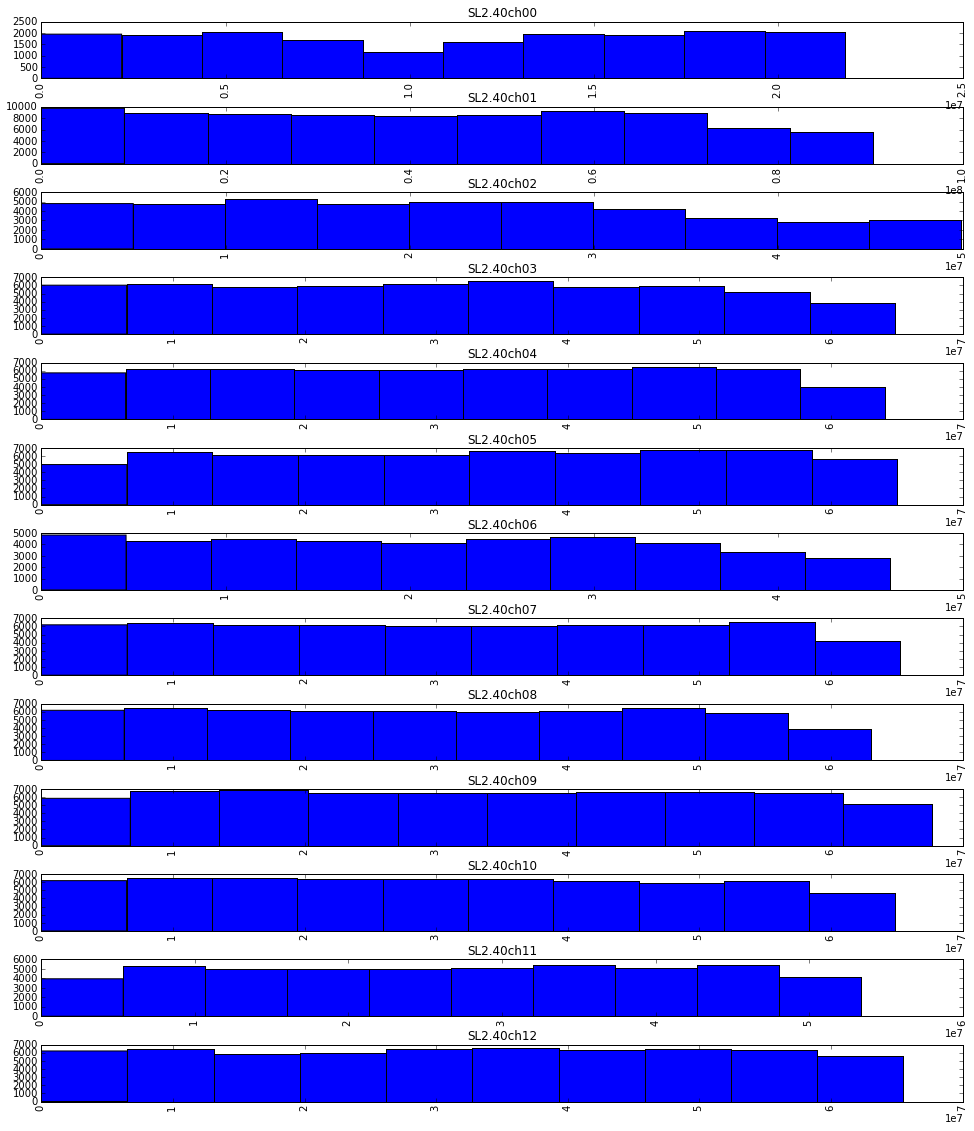

In [113]:
hsc = gffData['start'].hist(by=gffData['chromosome'], figsize=(CHROM_FIG_W, CHROM_FIG_H), layout=(len(chromosomes),1)) 

###Length distribution

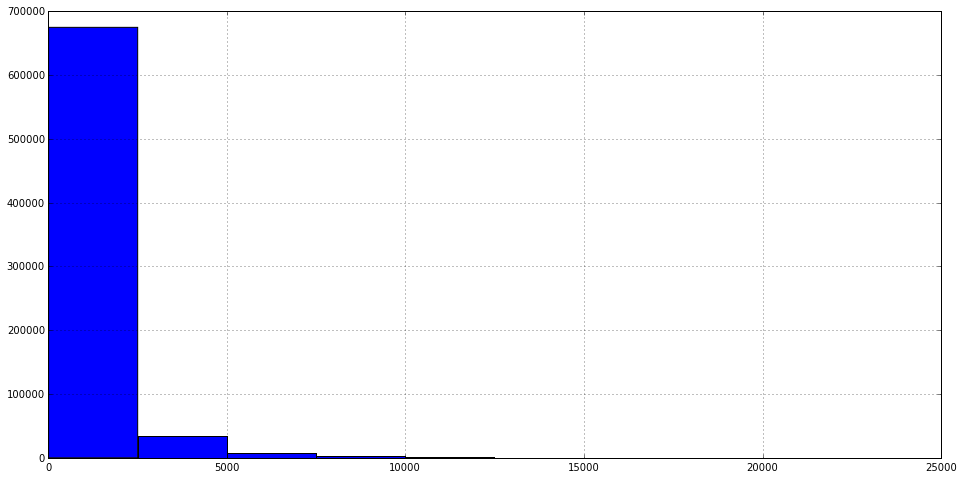

In [114]:
with size_controller(FULL_FIG_W, FULL_FIG_H):
    hl = gffData['length'].hist()

###Length distribution per chromosome

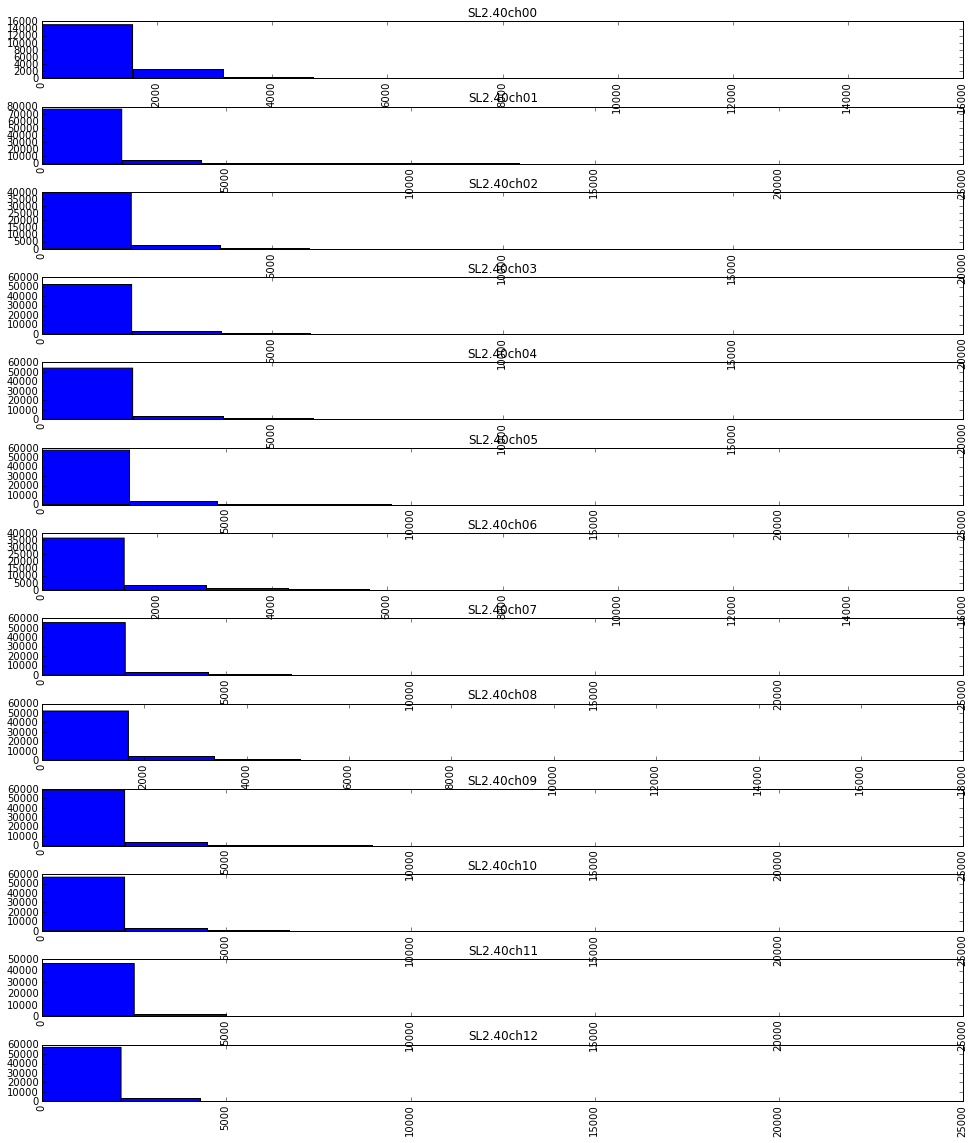

In [115]:
hlc = gffData['length'].hist(by=gffData['chromosome'], figsize=(CHROM_FIG_W, CHROM_FIG_H), layout=(len(chromosomes),1))

In [116]:
#http://stackoverflow.com/questions/27934885/how-to-hide-code-from-cells-in-ipython-notebook-visualized-with-nbviewer
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 var classes_to_hide = ['div.input', 'div.output_stderr', 'div.output_prompt', 'div.input_prompt', 'div.prompt'];
 if (code_show){
    for ( var c in classes_to_hide ) {
        $(classes_to_hide[c]).hide();
    }
 } else {
    for ( var c in classes_to_hide ) {
         $(classes_to_hide[c]).show();
    }
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Clickk here to toggle on/off the raw code."></form>''')